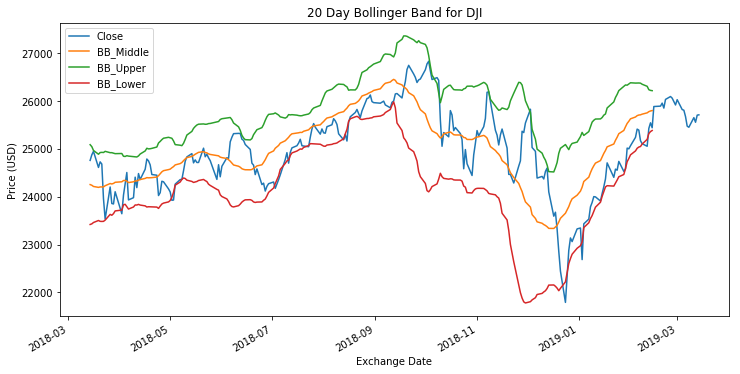

                  Close  20 Day Moving Avg  20 Day Std Dev      BB_Lower  \
Exchange Date                                                              
2019-03-14     25709.94                NaN             NaN           NaN   
2019-03-13     25702.89                NaN             NaN           NaN   
2019-03-12     25554.66                NaN             NaN           NaN   
2019-03-11     25650.88                NaN             NaN           NaN   
2019-03-08     25450.24                NaN             NaN           NaN   
2019-03-07     25473.23                NaN             NaN           NaN   
2019-03-06     25673.46                NaN             NaN           NaN   
2019-03-05     25806.63                NaN             NaN           NaN   
2019-03-04     25819.65                NaN             NaN           NaN   
2019-03-01     26026.32                NaN             NaN           NaN   
2019-02-28     25916.00                NaN             NaN           NaN   
2019-02-27  

In [61]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# Reading in DJI data
dji = pd.read_excel("Assignment 3&4-data files/{}.xlsx".format('DJI-daily'), skiprows=22,usecols=[0, 1],index_col=0)
helper_data = dji.copy()

# Indicator 4: Bollinger Bands of length 20
# using this resource https://medium.com/python-data/setting-up-a-bollinger-band-with-python-28941e2fa300

# Finding 20 day moving average and standard deviation
twentyDay = dji['Close'].rolling(window=20)
dji['ROI'] = dji['Close'] / dji['Close'].shift(periods=-1) - 1
dji['BB_Middle'] = twentyDay.mean() 
helper_data['20 Day Moving Avg'] = twentyDay.mean() 
# dji['20 Day Std Dev'] = twentyDay.std()
helper_data['20 Day Std Dev'] = twentyDay.std()

# Finding upper and lower band (moving avg +- 2*std dev)
dji['BB_Lower'] = dji['BB_Middle'] - (helper_data['20 Day Std Dev'] * 2)
helper_data['BB_Lower'] = helper_data['20 Day Moving Avg'] - (helper_data['20 Day Std Dev'] * 2)
dji['BB_Upper'] = dji['BB_Middle'] + (helper_data['20 Day Std Dev'] * 2)
helper_data['BB_Upper'] = helper_data['20 Day Moving Avg'] + (helper_data['20 Day Std Dev'] * 2)


# Sellsignal - Closing price crosses below upperband and was above upperband within 5 recent periods (0 or 1)
dji['Sell_calc'] = dji['Close'] - dji['BB_Upper']
dji['Buy_calc'] = dji['Close'] - dji['BB_Lower']
dji['Buysignal'] = 0
dji['Sellsignal'] = 0

for i in range(0, len(dji)):
    if (dji['Sell_calc'].iloc[i] < 0):
        if (dji['Sell_calc'].iloc[i-1] > 0):
            if (dji['Sell_calc'].iloc[i-2] > 0):
                if (dji['Sell_calc'].iloc[i-3] > 0):
                    if (dji['Sell_calc'].iloc[i-4] > 0):  
                        if (dji['Sell_calc'].iloc[i-5] > 0): 
                            dji['Sellsignal'].iloc[i] = 1


for i in range(0, len(dji)):
    if (dji['Sellsignal'].iloc[i] != 1):
        dji['Sellsignal'].iloc[i] = 0


for i in range(0, len(dji)):
    if (dji['Buy_calc'].iloc[i] > 0):
        if (dji['Buy_calc'].iloc[i-1] < 0):
            if (dji['Buy_calc'].iloc[i-2] < 0):
                if (dji['Buy_calc'].iloc[i-3] < 0):
                    if (dji['Buy_calc'].iloc[i-4] < 0):  
                        if (dji['Buy_calc'].iloc[i-5] < 0):  
                            dji['Buysignal'].iloc[i] = 1


for i in range(0, len(dji)):
    if (dji['Buysignal'].iloc[i] != 1):
        dji['Buysignal'].iloc[i] = 0                   
                                 
                        

# Plotting
dji[['Close', 'BB_Middle', 'BB_Upper', 'BB_Lower']].plot(figsize=(12,6))
plt.title('20 Day Bollinger Band for DJI')
plt.ylabel('Price (USD)')
plt.show()

# Outputting to csv
dji.to_csv('Bollinger Bands.csv')


print(helper_data)

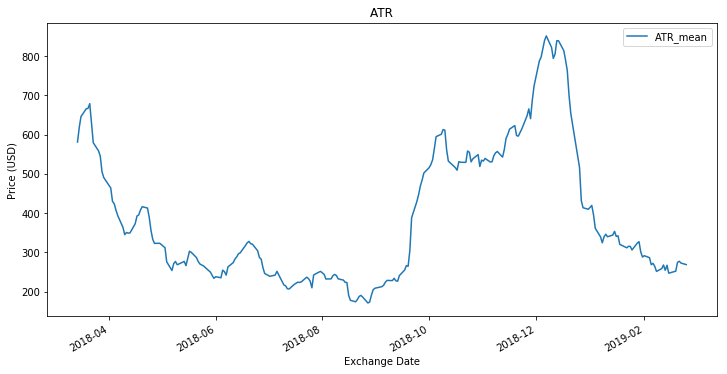

In [43]:
# Indicator of Choice - Average True Range (ATR)

dji2 = pd.read_excel("Assignment 3&4-data files/{}.xlsx".format('DJI-daily'), skiprows=22,usecols=[0, 1,6,7],index_col=0)


ATR = pd.DataFrame()
ATR['ATR_part1'] = abs (dji2['High'] - dji2['Low'])
ATR['ATR_part2'] = abs (dji2['High'] - dji2['Close'].shift())
ATR['ATR_part3'] = abs (dji2['Low'] - dji2['Close'].shift())
ATR['ATR_max'] = ATR.max(axis=1)
ATR['ATR_mean'] = ATR['ATR_max'].rolling(window=14).mean()


ATR[['ATR_mean']].plot(figsize=(12,6))
plt.title('ATR')
plt.ylabel('Price (USD)')
plt.show()

ATR.to_csv("ATR.csv")